# MacMahon Triangles

A simple application of exact covers with colours is to edge-matching puzzles. One such puzzle was devised by [MacMahon](https://en.wikipedia.org/wiki/Percy_Alexander_MacMahon) and consists of a set of [24 triangular tiles](https://en.wikipedia.org/wiki/Trioker) which can be arranged in the shape of a hexagon. Each tile is an equilateral triangle with each edge coloured using one of 4 different colours. The tiles can be arranged so that the boundary of the hexagon is a single colour.

As an exact cover problem each option describes the covering of a certain cell of the mesh by a certain piece in a certain orientation (the pieces can be rotated). The pieces and the cells are primary items: each piece must be used once and only once and each cell must be covered by one tile. The option also describes the colouring of the edges. Each edge is a secondary item and is assigned a particular colour in a given option. The colours on neighbouring edges must match.

The main routines are in separate python script, and a simple solver using `xcover` is given below.

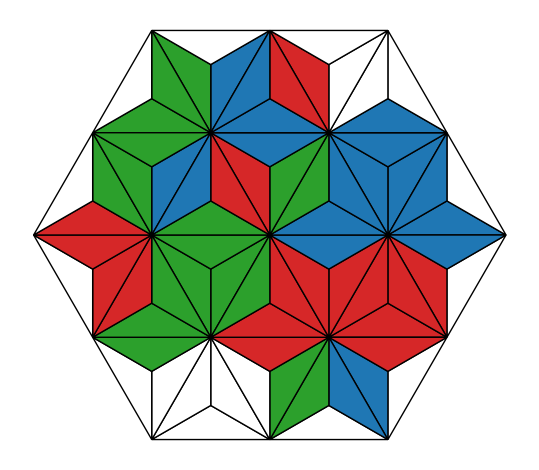

In [1]:
from macmahon import (
    macmahon_mesh,
    macmahon_pieces,
    macmahon_options,
    macmahon_primary,
    plot_solution,
)
from xcover import covers

def macmahon_solver(boundary_word, boundary_color="a"):
    cells, boundary_edges = macmahon_mesh(boundary_word)
    pieces = macmahon_pieces()
    options = macmahon_options(cells, pieces, boundary_color, boundary_edges)
    primary = macmahon_primary(cells, pieces)

    for cover in covers(options, primary=primary, colored=True):
        yield [options[j] for j in cover]


boundary_word = r"_2/2\2_-2/-2\-2"  # hexagon
# boundary_word = r"_4/3_-4/-3"  # parallelogram
# boundary_word = r"_3/2_-1\2_-1/-2_-1\-2"  # boat
# boundary_word = r"_1\-1/2\1/1\2/-1_-1/-2\-2" # Philpott 5

solver = macmahon_solver(boundary_word)
solution = next(solver)
plot_solution(solution)

All the different ways of tiling the hexagon can be enumerated with the following code, but be warned this takes some time (~10 minutes or so) to run.

In [2]:
boundary_word = r"_2/2\2_-2/-2\-2"  # hexagon
solver = macmahon_solver(boundary_word)
print(f"There are {sum(1 for _ in solver)} possible solutions")

There are 11853792 possible solutions
